In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv("/content/train.csv")

In [2]:
df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [3]:
df.shape

(700, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
x = df.iloc[0:700,0:1]
y = df.iloc[0:700,1:2]

In [6]:
x

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0
...,...
695,58.0
696,93.0
697,82.0
698,66.0


In [7]:
y

,y
0,21.549452
1,47.464463
2,17.218656
3,36.586398
4,87.288984
...,...
695,58.595006
696,94.625094
697,88.603770
698,63.648685


<Axes: >

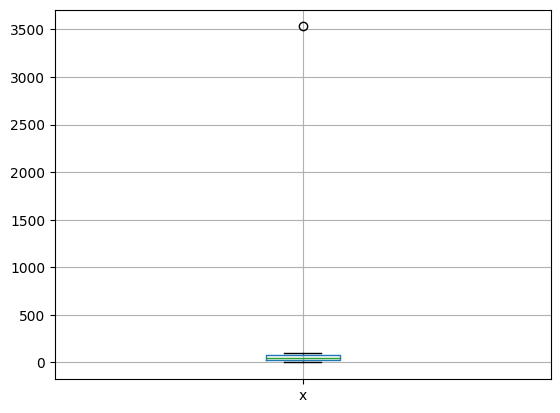

In [8]:
x.boxplot(column=['x'])

<Axes: >

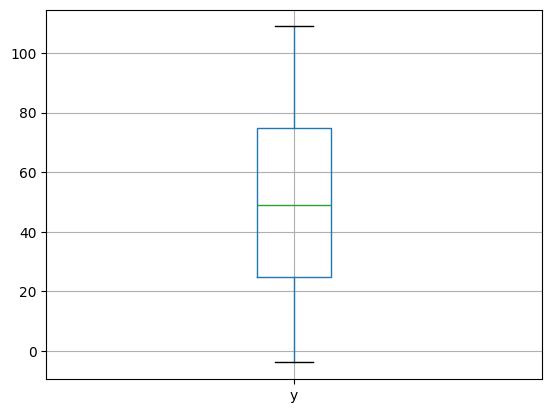

In [9]:
y.boxplot(column=['y'])

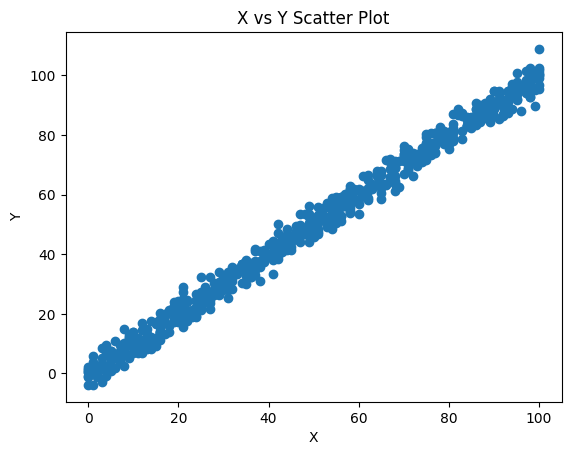

In [10]:
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y Scatter Plot')
plt.show()

In [11]:
def hypothesis(theta_array,x):
  return theta_array[0] + theta_array[1] * x

In [12]:
def cost_function(theta_array, x, y, m):
  return sum([((hypothesis(theta_array,x[i]) - y[i])**2) for i in range(m)])/(2*m)
  # errors = 0
  # for i in range(m):
  #  errors += (hypothesis(theta_array,x[i]) - y[i]**2)
  # return errors/(2*m)

In [13]:
def gradient_descent(theta_array, x, y, m, alpha):
  temp = 0
  sum_0 = 0
  sum_1 = 0
  for i in range(m):
    temp = (hypothesis(theta_array,x[i]) - y[i])
    sum_0 += temp
    sum_1 += temp * x[i]
  return [theta_array[0] - (alpha/m) * sum_0, theta_array[1] - (alpha/m) * sum_1] #[new_theta0, new_theta1]

In [14]:
def training(x, y, alpha, iters):
  theta_array = [0,0]
  m = x.size
  cost = []
  for i in range(iters):
    theta_array = gradient_descent(theta_array, x, y, m, alpha)
    cost.append(cost_function(theta_array, x, y, m))
  return cost,theta_array

In [15]:
training_df = df.dropna()
training_df.shape

(699, 2)

In [16]:
x_val = training_df['x']
y_val = training_df['y']

In [17]:
type(x_val)

pandas.core.series.Series

In [18]:
x_val = x_val.values.reshape(x_val.size)
y_val = y_val.values.reshape(y_val.size)

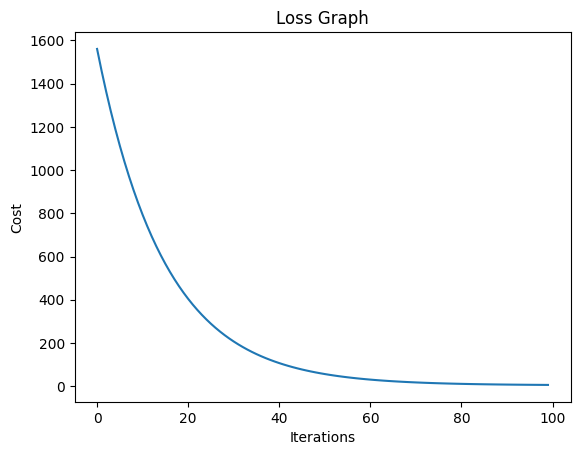

[np.float64(0.014432300922318137), np.float64(0.9653705663247713)]


In [20]:
alpha = 0.00001
iters = 100
cost_values,theta_array = training(x_val,y_val,alpha,iters)
x_axis = np.arange(0, len(cost_values), step=1)
plt.plot(x_axis, cost_values)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Loss Graph')
plt.show()
print(theta_array)